## Setting your toolbox

In [1]:
import warnings
import intake
import xarray as xr 
import proplot as plot 
import matplotlib.pyplot as plt 

warnings.filterwarnings('ignore')

## Reading the data catalogue

In [2]:
dataframe = intake.open_esm_datastore("https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json")

In [3]:
type(dataframe)

intake_esm.core.esm_datastore

In [4]:
dataframe.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
0,AerChemMIP,BCC,BCC-ESM1,piClim-CH4,r1i1p1f1,Amon,ch4,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/piClim-CH4/...,NaN
1,AerChemMIP,BCC,BCC-ESM1,piClim-CH4,r1i1p1f1,Amon,clt,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/piClim-CH4/...,NaN
2,AerChemMIP,BCC,BCC-ESM1,piClim-CH4,r1i1p1f1,Amon,co2,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/piClim-CH4/...,NaN
3,AerChemMIP,BCC,BCC-ESM1,piClim-CH4,r1i1p1f1,Amon,evspsbl,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/piClim-CH4/...,NaN
4,AerChemMIP,BCC,BCC-ESM1,piClim-CH4,r1i1p1f1,Amon,hfls,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/piClim-CH4/...,NaN


In [5]:
dataframe.df.columns

Index(['activity_id', 'institution_id', 'source_id', 'experiment_id',
       'member_id', 'table_id', 'variable_id', 'grid_label', 'zstore',
       'dcpp_init_year'],
      dtype='object')

## Searching for datasets

In [6]:
models = dataframe.search(experiment_id='historical',
                          table_id='Amon',
                          variable_id='tas',
                          institution_id='NCAR',
                          member_id='r11i1p1f1')

In [17]:
type(models)

intake_esm.core.esm_datastore

In [14]:
models

pangeo-cmip6-ESM Collection with 1 entries:
	> 1 activity_id(s)

	> 1 institution_id(s)

	> 1 source_id(s)

	> 1 experiment_id(s)

	> 1 member_id(s)

	> 1 table_id(s)

	> 1 variable_id(s)

	> 1 grid_label(s)

	> 1 zstore(s)

	> 0 dcpp_init_year(s)

## Finally getting your hands on the data

In [7]:
datasets = models.to_dataset_dict()

Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)


In [18]:
type(datasets)

dict

In [8]:
datasets.keys()

dict_keys(['CMIP.NCAR.CESM2.historical.Amon.gn'])

In [9]:
dset = datasets['CMIP.NCAR.CESM2.historical.Amon.gn']

In [10]:
type(dset)

xarray.core.dataset.Dataset

In [16]:
dset

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, member_id: 1, nbnd: 2, time: 1980)
Coordinates:
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * member_id  (member_id) <U9 'r11i1p1f1'
Dimensions without coordinates: nbnd
Data variables:
    tas        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 600, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.011
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-04-02T03:42:21Z
    data_specs_version:     01.00.29
    experiment:             Simulation of recent past (1850 to 2014). Impose ...
    experiment_id:          historical
    external_variables:     areacella
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...
    grid:                   native 0.9x1.25 finite volume grid (192x288 latxlon)
    grid_label:             gn
    history:                2019-03-30T03:00:36Z ; CMOR rewrote data to be co...
    initialization_index:   1
    institution:            National Center for Atmospheric Research, Climate...
    institution_id:         NCAR
    license:                CMIP6 model data produced by <The National Center...
    mip_era:                CMIP6
    model_doi_url:          https://doi.org/10.5065/D67H1H0V
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       CESM2
    parent_time_units:      days since 0001-01-01 00:00:00
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      11
    realm:                  atmos
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    source_id:              CESM2
    source_type:            AOGCM BGC
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Amon
    tracking_id:            hdl:21.14100/a7278f6d-6a1b-4050-8f06-a8033604736a...
    variable_id:            tas
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    intake_esm_varname:     tas

## Plotting

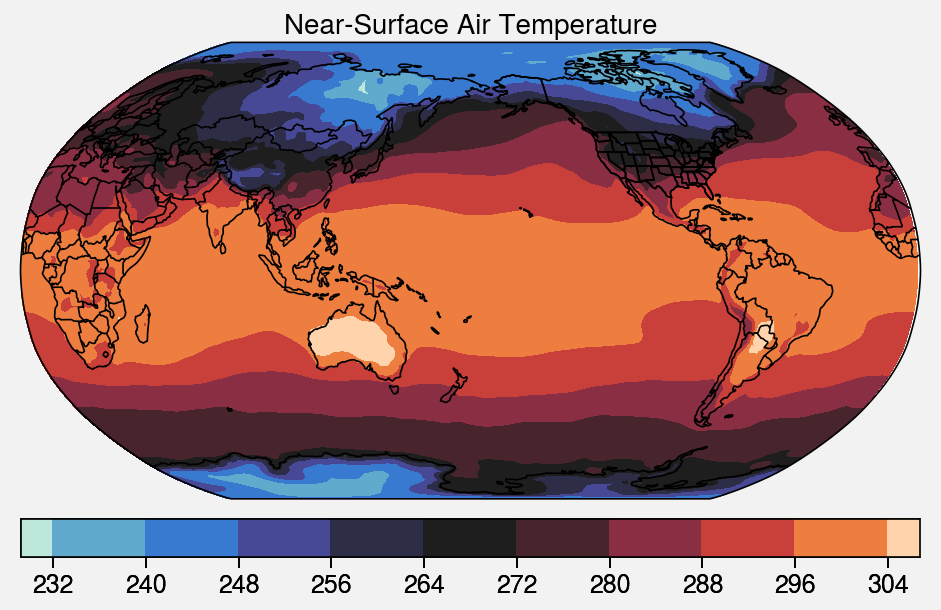

In [19]:
fig, ax = plot.subplots(axwidth=4.5, tight=True,
                        proj='robin', proj_kw={'lon_0': 180},)
# format options
ax.format(land=False, coast=True, innerborders=True, borders=True,
          labels=True, geogridlinewidth=0,)

map1 = ax.contourf(dset['lon'], dset['lat'], dset['tas'][0, 0, :, :],
                   cmap='IceFire', extend='both')

ax.colorbar(map1, loc='b', shrink=0.5, extendrect=True)

plt.show()